# Αναγνώριση Προτύπων - 1η Εργαστηριακή Άσκηση 

---
 
## Θέμα: Οπτική Αναγνώριση Ψηφίων
## ΣΧΟΛΗ: ΣΗΜΜΥ

Ονοματεπώνυμο | Αριθμός Μητρώου
------------ | -------------
Γιάννης Πιτόσκας | 03115077
Αντώνης Παπαοικονόμου | 03115140

In [13]:
import sklearn
from scipy.spatial import Voronoi, voronoi_plot_2d
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.decomposition import PCA
from euclidean_classifier import EuclideanClassifier


def readData(data_type):

    dir = './pr_lab1_2016-17_data/' + data_type + '.txt'
    with open(dir, 'r') as file:
        lines = file.read().splitlines()
        # random.shuffle(lines)

    features, digits = [], []
    for line in lines:
        line = [float(i) for i in line.rstrip().split(" ")]
        features.append(line[1:])
        digits.append(int(line[0]))

    return np.asarray(features), np.asarray(digits)

In [2]:
# STEP 1
X_train, y_train = readData('train')
X_test, y_test = readData('test')

n_samples, n_features = X_train.shape
n_test_samples, _ = X_test.shape
n_classes = 10

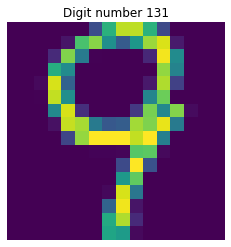

In [3]:
# STEP 2 - plot 131st digit
digit_131 = np.reshape(X_train[131],(16,16))
plt.figure()
plt.title("Digit number 131")
plt.axis("off")
plt.imshow(digit_131)
plt.show()

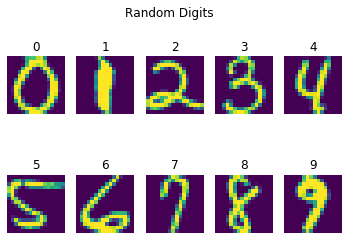

In [4]:
# STEP 3 - plot one sample for each digit 0-9
fig, axs = plt.subplots(2, 5)
fig.suptitle("Random Digits")
for digit in range(n_classes):
    rand = random.randint(0, n_samples-1)
    while (y_train[rand] != digit):
        rand = random.randint(0, n_samples-1)
    dig = np.reshape(X_train[rand],(16,16))
    axs[digit // 5, digit % 5].imshow(dig)
    axs[digit // 5, digit % 5].axis("off")
    axs[digit // 5, digit % 5].set_title(str(digit))

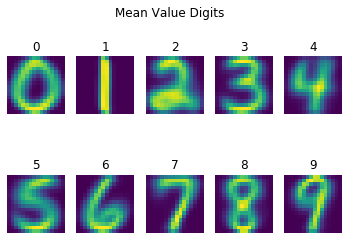

In [5]:
digit_count = np.zeros(n_classes)
digit_mean = np.zeros((n_classes, n_features))
digit_var = np.zeros((n_classes, n_features))

for i in range(n_samples):
    digit = y_train[i]
    digit_count[digit] = digit_count[digit] + 1
    digit_mean[digit] = digit_mean[digit] + X_train[i]

# STEP 9 (b)

# Digit based on Mean
fig, axs = plt.subplots(2, 5)
fig.suptitle("Mean Value Digits")
for digit in range(n_classes):
    digit_mean[digit] = digit_mean[digit] / digit_count[digit]
    axs[digit // 5, digit % 5].imshow(np.reshape(digit_mean[digit],(16,16)))
    axs[digit // 5, digit % 5].axis("off")
    axs[digit // 5, digit % 5].set_title(str(digit))

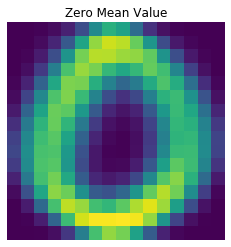

The mean value of pixel (10,10) of 0 is: -0.5041884422110553


In [6]:
# STEP 4 & 7
digit_mean_zero = np.reshape(digit_mean[0],(16,16))
plt.figure()
plt.title("Zero Mean Value")
plt.axis("off")
plt.imshow(digit_mean_zero)
plt.show()
print("The mean value of pixel (10,10) of 0 is:", digit_mean_zero[10][10])

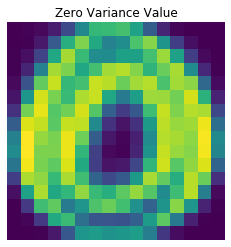

The variance value of pixel (10,10) of 0 is: 0.5249618093885225


In [7]:
for i in range(n_samples):
    digit = y_train[i]
    digit_var[digit] = digit_var[digit] + (X_train[i] - digit_mean[digit])**2

# STEP 9 (a)

# Digit based on Variance
for digit in range(n_classes):
    digit_var[digit] = digit_var[digit] / (digit_count[digit] - 1)

# STEP 5 & 8
digit_var_zero = np.reshape(digit_var[0],(16,16))
plt.figure()
plt.title("Zero Variance Value")
plt.axis("off")
plt.imshow(digit_var_zero)
plt.show()
print("The variance value of pixel (10,10) of 0 is:", digit_var_zero[10][10])

In [8]:
# STEP 6

print("The mean value of 0 is: (first 4 numbers)", digit_mean[0][0:4])
print("The variance value of 0 is: (first 4 numbers)", digit_var[0][0:4])

for digit in range(n_classes):
    print("The mean value of", digit, "is: (first number only)", digit_mean[digit][0])
    print("The variance value of", digit, "is: (first number only)", digit_var[digit][0])

The mean value of 0 is: (first 4 numbers) [-0.99862814 -0.99539782 -0.98492295 -0.94125126]
The variance value of 0 is: (first 4 numbers) [0.00224711 0.00661218 0.01960704 0.06295393]
The mean value of 0 is: (first number only) -0.9986281407035177
The variance value of 0 is: (first number only) 0.002247105527638201
The mean value of 1 is: (first number only) -1.0
The variance value of 1 is: (first number only) 0.0
The mean value of 2 is: (first number only) -0.9924883720930233
The variance value of 2 is: (first number only) 0.005090387193373648
The mean value of 3 is: (first number only) -0.9975151975683889
The variance value of 3 is: (first number only) 0.0012149350807067123
The mean value of 4 is: (first number only) -1.0
The variance value of 4 is: (first number only) 0.0
The mean value of 5 is: (first number only) -0.9994586330935253
The variance value of 5 is: (first number only) 0.0001629514388489166
The mean value of 6 is: (first number only) -1.0
The variance value of 6 is: (fi

In [9]:
# STEP 10

digit_101_pred = np.argmin(np.linalg.norm(digit_mean - X_test[101], axis = 1))
print("Actual value of digit 101:", y_test[101])
print("The result of the Euclidean Classifier on digit 101 is:", digit_101_pred)

Actual value of digit 101: 6
The result of the Euclidean Classifier on digit 101 is: 0


In [10]:
# STEP 11

# Minimum Euclidean Distance from Mean
accuracy = 0.0
for i in range(n_test_samples):
    accuracy += np.argmin(np.linalg.norm(digit_mean - X_test[i], axis = 1)) == y_test[i]
accuracy /= n_test_samples
print("The accuracy of the Euclidean Classifier on the test set is:", accuracy)

The accuracy of the Euclidean Classifier on the test set is: 0.8141504733432985


The average score using 5-fold cross-validation is: 0.841773724173982


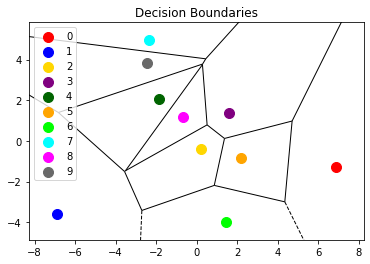

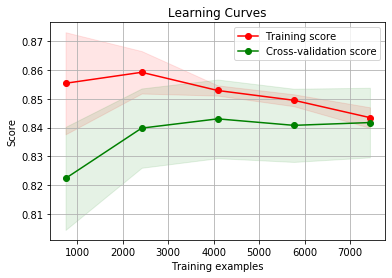

In [12]:
# STEP 13

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

def plot_decision_boundaries(points):

    vor = Voronoi(points)
    voronoi_plot_2d(vor,show_points=False, show_vertices=False)
    plt.scatter(points[:,0], points[:,1], c=range(10), s=30, edgecolor = 'k')
    cdict = {0 : 'red', 1 : 'blue', 2 : 'gold', 3 : 'purple', 4 : 'darkgreen', 5 : 'orange', 6 : 'lime', 7 : 'cyan', 8 : 'magenta', 9 : 'dimgray'}

    for point,label in zip(points,range(10)):
        plt.scatter(point[0], point[1], c=cdict[label], label = label, s = 100)
        label += 1
    plt.legend(prop={'size':10})
    plt.title('Decision Boundaries')
    plt.show()

    return

# Euclidean Classifier
clf = EuclideanClassifier()
clf.fit(X_train, y_train)
# print(clf.score(X_test, y_test))

# 5-Fold Cross-Validation
X = np.concatenate((X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)
average_score = np.mean(cross_val_score(EuclideanClassifier(), X, y, cv = 5))
print("The average score using 5-fold cross-validation is:", average_score)


# PCA 256 to 2 dims => for Decision Boundaries visualization
X_train_reduced = PCA(n_components=2).fit_transform(X_train)
X_test_reduced = PCA(n_components=2).fit_transform(X_test)

clf2 = EuclideanClassifier()
clf2.fit(X_train_reduced, y_train)
# print(clf2.score(X_test_reduced, y_test))

# Plot Decision Boundaries for 2 dims
plot_decision_boundaries(clf2.X_mean_)

# 13.c
# Plot Learning Curve
plot_learning_curve(EuclideanClassifier(), "Learning Curves", X, y, cv = 5, n_jobs= 4)